In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from util import *

train_split=0.7 # fraction of the data used in a training set

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [24]:
######################################################################
#################### Load raw TADPOLE Data COMPLETE. ##########################
######################################################################
biomarkers = [
#                 'FDG', 'AV45',
#                 'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17',
#                 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
    
#                 'CEREBELLUMGREYMATTER_UCBERKELEYAV45_10_17_16',
#                 'WHOLECEREBELLUM_UCBERKELEYAV45_10_17_16',
#                 'ERODED_SUBCORTICALWM_UCBERKELEYAV45_10_17_16',
#                 'FRONTAL_UCBERKELEYAV45_10_17_16',
#                 'CINGULATE_UCBERKELEYAV45_10_17_16',
#                 'PARIETAL_UCBERKELEYAV45_10_17_16',
#                 'TEMPORAL_UCBERKELEYAV45_10_17_16',
#                 'SUMMARYSUVR_WHOLECEREBNORM_UCBERKELEYAV45_10_17_16',
#                 'SUMMARYSUVR_WHOLECEREBNORM_1.11CUTOFF_UCBERKELEYAV45_10_17_16',
#                 'SUMMARYSUVR_COMPOSITE_REFNORM_UCBERKELEYAV45_10_17_16',
#                 'SUMMARYSUVR_COMPOSITE_REFNORM_0.79CUTOFF_UCBERKELEYAV45_10_17_16',
#                 'BRAINSTEM_UCBERKELEYAV45_10_17_16',
#                 'BRAINSTEM_SIZE_UCBERKELEYAV45_10_17_16',
#                 'VENTRICLE_3RD_UCBERKELEYAV45_10_17_16',
#                 'VENTRICLE_3RD_SIZE_UCBERKELEYAV45_10_17_16',
#                 'VENTRICLE_4TH_UCBERKELEYAV45_10_17_16',
#                 'VENTRICLE_4TH_SIZE_UCBERKELEYAV45_10_17_16',
#                 'VENTRICLE_5TH_UCBERKELEYAV45_10_17_16',
#                 'VENTRICLE_5TH_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CC_ANTERIOR_UCBERKELEYAV45_10_17_16',
#                 'CC_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CC_CENTRAL_UCBERKELEYAV45_10_17_16',
#                 'CC_CENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CC_MID_ANTERIOR_UCBERKELEYAV45_10_17_16',
#                 'CC_MID_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CC_MID_POSTERIOR_UCBERKELEYAV45_10_17_16',
#                 'CC_MID_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CC_POSTERIOR_UCBERKELEYAV45_10_17_16',
#                 'CC_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CSF_UCBERKELEYAV45_10_17_16',
#                 'CSF_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_BANKSSTS_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_BANKSSTS_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_CAUDALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_CAUDALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_CAUDALMIDDLEFRONTAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_CAUDALMIDDLEFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_CUNEUS_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_CUNEUS_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_ENTORHINAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_ENTORHINAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_FRONTALPOLE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_FRONTALPOLE_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_FUSIFORM_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_FUSIFORM_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_INFERIORPARIETAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_INFERIORPARIETAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_INFERIORTEMPORAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_INFERIORTEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_INSULA_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_INSULA_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_ISTHMUSCINGULATE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_ISTHMUSCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_LATERALOCCIPITAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_LATERALOCCIPITAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_LATERALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_LATERALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_LINGUAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_LINGUAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_MEDIALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_MEDIALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_MIDDLETEMPORAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_MIDDLETEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_PARACENTRAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_PARACENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16',
#                 'CTX_LH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_17_16',

    
    ######### UCBERKELEYAV45
'CEREBELLUMGREYMATTER_UCBERKELEYAV45_10_17_16',
'WHOLECEREBELLUM_UCBERKELEYAV45_10_17_16',
'ERODED_SUBCORTICALWM_UCBERKELEYAV45_10_17_16',
'FRONTAL_UCBERKELEYAV45_10_17_16',
'CINGULATE_UCBERKELEYAV45_10_17_16',
'PARIETAL_UCBERKELEYAV45_10_17_16',
'TEMPORAL_UCBERKELEYAV45_10_17_16',
'SUMMARYSUVR_WHOLECEREBNORM_UCBERKELEYAV45_10_17_16',
'SUMMARYSUVR_WHOLECEREBNORM_1.11CUTOFF_UCBERKELEYAV45_10_17_16',
'SUMMARYSUVR_COMPOSITE_REFNORM_UCBERKELEYAV45_10_17_16',
'SUMMARYSUVR_COMPOSITE_REFNORM_0.79CUTOFF_UCBERKELEYAV45_10_17_16',
'BRAINSTEM_UCBERKELEYAV45_10_17_16',
'BRAINSTEM_SIZE_UCBERKELEYAV45_10_17_16',
'VENTRICLE_3RD_UCBERKELEYAV45_10_17_16',
'VENTRICLE_3RD_SIZE_UCBERKELEYAV45_10_17_16',
'VENTRICLE_4TH_UCBERKELEYAV45_10_17_16',
'VENTRICLE_4TH_SIZE_UCBERKELEYAV45_10_17_16',
'VENTRICLE_5TH_UCBERKELEYAV45_10_17_16',
'VENTRICLE_5TH_SIZE_UCBERKELEYAV45_10_17_16',
'CC_ANTERIOR_UCBERKELEYAV45_10_17_16',
'CC_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
'CC_CENTRAL_UCBERKELEYAV45_10_17_16',
'CC_CENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
'CC_MID_ANTERIOR_UCBERKELEYAV45_10_17_16',
'CC_MID_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
'CC_MID_POSTERIOR_UCBERKELEYAV45_10_17_16',
'CC_MID_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
'CC_POSTERIOR_UCBERKELEYAV45_10_17_16',
'CC_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
'CSF_UCBERKELEYAV45_10_17_16',
'CSF_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_BANKSSTS_UCBERKELEYAV45_10_17_16',
'CTX_LH_BANKSSTS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_CAUDALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_LH_CAUDALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_CAUDALMIDDLEFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_CAUDALMIDDLEFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_CUNEUS_UCBERKELEYAV45_10_17_16',
'CTX_LH_CUNEUS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_ENTORHINAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_ENTORHINAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_FRONTALPOLE_UCBERKELEYAV45_10_17_16',
'CTX_LH_FRONTALPOLE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_FUSIFORM_UCBERKELEYAV45_10_17_16',
'CTX_LH_FUSIFORM_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_INFERIORPARIETAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_INFERIORPARIETAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_INFERIORTEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_INFERIORTEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_INSULA_UCBERKELEYAV45_10_17_16',
'CTX_LH_INSULA_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_ISTHMUSCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_LH_ISTHMUSCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_LATERALOCCIPITAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_LATERALOCCIPITAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_LATERALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_LATERALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_LINGUAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_LINGUAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_MEDIALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_MEDIALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_MIDDLETEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_MIDDLETEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARACENTRAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARACENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARSOPERCULARIS_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARSOPERCULARIS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARSORBITALIS_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARSORBITALIS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARSTRIANGULARIS_UCBERKELEYAV45_10_17_16',
'CTX_LH_PARSTRIANGULARIS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PERICALCARINE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PERICALCARINE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_POSTCENTRAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_POSTCENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_POSTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_LH_POSTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PRECENTRAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_PRECENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_PRECUNEUS_UCBERKELEYAV45_10_17_16',
'CTX_LH_PRECUNEUS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_ROSTRALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_LH_ROSTRALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_ROSTRALMIDDLEFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_ROSTRALMIDDLEFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPERIORFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPERIORFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPERIORPARIETAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPERIORPARIETAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPERIORTEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPERIORTEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPRAMARGINAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_SUPRAMARGINAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_TEMPORALPOLE_UCBERKELEYAV45_10_17_16',
'CTX_LH_TEMPORALPOLE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_TRANSVERSETEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_LH_TRANSVERSETEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_LH_UNKNOWN_UCBERKELEYAV45_10_17_16',
'CTX_LH_UNKNOWN_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_BANKSSTS_UCBERKELEYAV45_10_17_16',
'CTX_RH_BANKSSTS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_CAUDALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_RH_CAUDALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_CAUDALMIDDLEFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_CAUDALMIDDLEFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_CUNEUS_UCBERKELEYAV45_10_17_16',
'CTX_RH_CUNEUS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_ENTORHINAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_ENTORHINAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_FRONTALPOLE_UCBERKELEYAV45_10_17_16',
'CTX_RH_FRONTALPOLE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_FUSIFORM_UCBERKELEYAV45_10_17_16',
'CTX_RH_FUSIFORM_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_INFERIORPARIETAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_INFERIORPARIETAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_INFERIORTEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_INFERIORTEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_INSULA_UCBERKELEYAV45_10_17_16',
'CTX_RH_INSULA_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_ISTHMUSCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_RH_ISTHMUSCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_LATERALOCCIPITAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_LATERALOCCIPITAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_LATERALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_LATERALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_LINGUAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_LINGUAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_MEDIALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_MEDIALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_MIDDLETEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_MIDDLETEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARACENTRAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARACENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARSOPERCULARIS_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARSOPERCULARIS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARSORBITALIS_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARSORBITALIS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARSTRIANGULARIS_UCBERKELEYAV45_10_17_16',
'CTX_RH_PARSTRIANGULARIS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PERICALCARINE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PERICALCARINE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_POSTCENTRAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_POSTCENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_POSTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_RH_POSTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PRECENTRAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_PRECENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_PRECUNEUS_UCBERKELEYAV45_10_17_16',
'CTX_RH_PRECUNEUS_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_ROSTRALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
'CTX_RH_ROSTRALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_ROSTRALMIDDLEFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_ROSTRALMIDDLEFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPERIORFRONTAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPERIORFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPERIORPARIETAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPERIORPARIETAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPERIORTEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPERIORTEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPRAMARGINAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_SUPRAMARGINAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_TEMPORALPOLE_UCBERKELEYAV45_10_17_16',
'CTX_RH_TEMPORALPOLE_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_TRANSVERSETEMPORAL_UCBERKELEYAV45_10_17_16',
'CTX_RH_TRANSVERSETEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
'CTX_RH_UNKNOWN_UCBERKELEYAV45_10_17_16',
'CTX_RH_UNKNOWN_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_ACCUMBENS_AREA_UCBERKELEYAV45_10_17_16',
'LEFT_ACCUMBENS_AREA_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_AMYGDALA_UCBERKELEYAV45_10_17_16',
'LEFT_AMYGDALA_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_CAUDATE_UCBERKELEYAV45_10_17_16',
'LEFT_CAUDATE_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_CEREBELLUM_CORTEX_UCBERKELEYAV45_10_17_16',
'LEFT_CEREBELLUM_CORTEX_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_CEREBELLUM_WHITE_MATTER_UCBERKELEYAV45_10_17_16',
'LEFT_CEREBELLUM_WHITE_MATTER_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_CEREBRAL_WHITE_MATTER_UCBERKELEYAV45_10_17_16',
'LEFT_CEREBRAL_WHITE_MATTER_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_CHOROID_PLEXUS_UCBERKELEYAV45_10_17_16',
'LEFT_CHOROID_PLEXUS_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_HIPPOCAMPUS_UCBERKELEYAV45_10_17_16',
'LEFT_HIPPOCAMPUS_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_INF_LAT_VENT_UCBERKELEYAV45_10_17_16',
'LEFT_INF_LAT_VENT_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_LATERAL_VENTRICLE_UCBERKELEYAV45_10_17_16',
'LEFT_LATERAL_VENTRICLE_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_PALLIDUM_UCBERKELEYAV45_10_17_16',
'LEFT_PALLIDUM_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_PUTAMEN_UCBERKELEYAV45_10_17_16',
'LEFT_PUTAMEN_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_THALAMUS_PROPER_UCBERKELEYAV45_10_17_16',
'LEFT_THALAMUS_PROPER_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_VENTRALDC_UCBERKELEYAV45_10_17_16',
'LEFT_VENTRALDC_SIZE_UCBERKELEYAV45_10_17_16',
'LEFT_VESSEL_UCBERKELEYAV45_10_17_16',
'LEFT_VESSEL_SIZE_UCBERKELEYAV45_10_17_16',
'NON_WM_HYPOINTENSITIES_UCBERKELEYAV45_10_17_16',
'NON_WM_HYPOINTENSITIES_SIZE_UCBERKELEYAV45_10_17_16',
'OPTIC_CHIASM_UCBERKELEYAV45_10_17_16',
'OPTIC_CHIASM_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_ACCUMBENS_AREA_UCBERKELEYAV45_10_17_16',
'RIGHT_ACCUMBENS_AREA_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_AMYGDALA_UCBERKELEYAV45_10_17_16',
'RIGHT_AMYGDALA_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_CAUDATE_UCBERKELEYAV45_10_17_16',
'RIGHT_CAUDATE_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_CEREBELLUM_CORTEX_UCBERKELEYAV45_10_17_16',
'RIGHT_CEREBELLUM_CORTEX_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_CEREBELLUM_WHITE_MATTER_UCBERKELEYAV45_10_17_16',
'RIGHT_CEREBELLUM_WHITE_MATTER_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_CEREBRAL_WHITE_MATTER_UCBERKELEYAV45_10_17_16',
'RIGHT_CEREBRAL_WHITE_MATTER_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_CHOROID_PLEXUS_UCBERKELEYAV45_10_17_16',
'RIGHT_CHOROID_PLEXUS_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_HIPPOCAMPUS_UCBERKELEYAV45_10_17_16',
'RIGHT_HIPPOCAMPUS_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_INF_LAT_VENT_UCBERKELEYAV45_10_17_16',
'RIGHT_INF_LAT_VENT_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_LATERAL_VENTRICLE_UCBERKELEYAV45_10_17_16',
'RIGHT_LATERAL_VENTRICLE_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_PALLIDUM_UCBERKELEYAV45_10_17_16',
'RIGHT_PALLIDUM_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_PUTAMEN_UCBERKELEYAV45_10_17_16',
'RIGHT_PUTAMEN_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_THALAMUS_PROPER_UCBERKELEYAV45_10_17_16',
'RIGHT_THALAMUS_PROPER_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_VENTRALDC_UCBERKELEYAV45_10_17_16',
'RIGHT_VENTRALDC_SIZE_UCBERKELEYAV45_10_17_16',
'RIGHT_VESSEL_UCBERKELEYAV45_10_17_16',
'RIGHT_VESSEL_SIZE_UCBERKELEYAV45_10_17_16',
'WM_HYPOINTENSITIES_UCBERKELEYAV45_10_17_16',
'WM_HYPOINTENSITIES_SIZE_UCBERKELEYAV45_10_17_16',
            ]

demographic = ['AGE', 'PTGENDER', 'PTEDUCAT', 'PTMARRY','APOE4']

cognitive_test = [ 'ADAS11', 'MMSE', 'RAVLT_immediate'] #'CDRSB',]

features = biomarkers + demographic + cognitive_test


tadpole2 = pd.read_csv('TADPOLE_D1_D2.csv',
                       usecols=features + ['DX'],
                       low_memory=False)  
tadpole2 = tadpole2.dropna()
# tadpole2 = collapse_dx(tadpole2)
print('tadpole train labels preprocssed.')
print('NL' , np.sum(tadpole2['DX'] == 'NL'))
print('MCI' , np.sum(tadpole2['DX'] == 'MCI'))
print('Dementia' , np.sum(tadpole2['DX'] == 'Dementia'))
print('NL to MCI' , np.sum(tadpole2['DX'] == 'NL to MCI'))
print('MCI to NL' , np.sum(tadpole2['DX'] == 'MCI to NL'))
print('MCI to Dementia' , np.sum(tadpole2['DX'] == 'MCI to Dementia'))
# print('t2', tadpole2)



tadpole train labels preprocssed.
NL 2140
MCI 3298
Dementia 1454
NL to MCI 81
MCI to NL 67
MCI to Dementia 307


In [28]:
######### KFOLD CROSS VALIDATION ##########
models =   {
                'Linear SVM': LinearSVC(max_iter=1000000, dual=False, C=1.0), 
                'Linear SVM_05': LinearSVC(max_iter=1000000, dual=False, C=.05), 
                'Polynomial^3 SVM': svm.SVC(kernel='poly', C=1.0, max_iter=10000000),
                'Polynomial^3 SVM_05': svm.SVC(kernel='poly', C=.05, max_iter=10000000),
                'Polynomial^7 SVM': svm.SVC(kernel='poly', degree=7, C=1.0, max_iter=10000000),
                'Polynomial^7 SVM_05': svm.SVC(kernel='poly', degree=7, C=.05, max_iter=100000000),  
            }

In [29]:
x, y = preprocess_all_feat(tadpole2)
seed = 123
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=seed)

print(x.shape, y.shape, 'data points')
print('num Dementia', np.sum(y==0))
print('num NL', np.sum(y==1))
print()
kfold_CV(models, X_train, y_train, k=5, seed=seed)# svc='poly', svmc=.01)

(682, 245) (682, 1) data points
num Dementia DX    428
dtype: int64
num NL DX    254
dtype: int64



Model:  Linear SVM
Average Training Score :  0.984862385321
Average Dev Testing Score :  0.711926605505


Model:  Linear SVM_05


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average Training Score :  0.983486238532
Average Dev Testing Score :  0.706422018349


Model:  Polynomial^3 SVM
Average Training Score :  0.982110091743
Average Dev Testing Score :  0.710091743119


Model:  Polynomial^3 SVM_05
Average Training Score :  0.973394495413
Average Dev Testing Score :  0.717431192661


Model:  Polynomial^7 SVM
Average Training Score :  0.973394495413
Average Dev Testing Score :  0.711926605505


Model:  Polynomial^7 SVM_05
Average Training Score :  0.972018348624
Average Dev Testing Score :  0.715596330275


Best accuracy is:  0.759124087591
Confusion matrix
[[76 11]
 [22 28]]


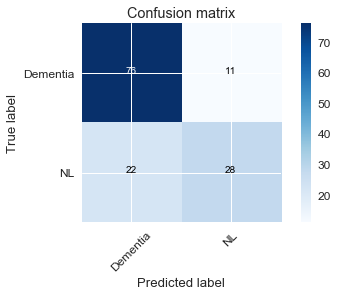

In [30]:
#### Choose best models above for testing ####
# best_model = models['Linear SVM']
best_model = models['Polynomial^7 SVM_05']

retrain_and_test_best_result(best_model, X_train, np.ravel(y_train), X_test, np.ravel(y_test))


In [ ]:
####################################################################

In [ ]:
################# NOTE: ONLY EXPERIMENTAL CODE BELOW ###############
########### Run the above for kfold cv and test results ############

In [ ]:
####################################################################

In [20]:
# USING OTHER BIOMARKERS 
# x_train, y_train, x_test, y_test = preprocess_volumetric(tadpole2, train_split)
# print('xt',x_train)

x, y = preprocess_all_feat(tadpole2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

# pd.unique(tadpole2['DX'])
# tadpole2

In [11]:
# Fit a linear kernel SVM model

# linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model = LinearSVC(verbose=2, max_iter=100000, dual=False, C=1.0)

linearsvm_model.fit(X_train, y_train)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=2)

In [12]:
# Evaluate using test set.
predicted_labels = linearsvm_model.predict(X_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(X_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

sklearn acc training acc:  0.882568807339
sklearn acc test acc:  0.729927007299


Confusion matrix
[[72 17]
 [20 28]]


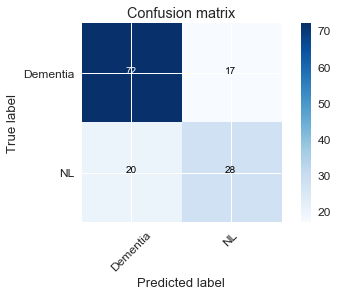

In [13]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Dementia','NL'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

**Combining Data**

1) Delete "NL to MCI" and "MCI to NL". There are only few of these data points.

2) Collapse "MCI to Dementia", "MCI", and "Dementia" into just "Dementia".

See collapse_dx in util.py

** BIOMARKERS ONLY **
  **NOTE: Uncollapsed labels. SVC linear**

    sklearn acc training acc:  0.631067961165 

    sklearn acc test acc:  0.436781609195


    LinearSVC, regularized

    sklearn acc training acc:  0.665048543689

    sklearn acc test acc:  0.436781609195


  **Collapsed MCI -> NL**

    sklearn acc training acc:  0.921951219512

    sklearn acc test acc:  0.767441860465


In [15]:
# USING BIOMARKERS + DEMOGRAPHIC + COGNITIVE TESTS
#x, y = preprocess_all_feat(tadpole2)
#x_train, y_train, x_test, y_test = split_data(x,y, train_split)
#print('y',y_train)
# Fit a linear kernel SVM model

#linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model = LinearSVC(verbose=2, max_iter=100000, dual=False, C=1.0)

linearsvm_model.fit(X_train, y_train)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=2)

sklearn acc training acc:  0.882568807339
sklearn acc test acc:  0.729927007299
Confusion matrix
[[72 17]
 [20 28]]


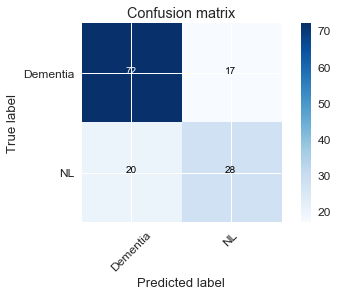

In [17]:
# Evaluate using test set.
predicted_labels = linearsvm_model.predict(X_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(X_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Dementia','NL'])
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

** BIOMARKERS + DEMOGRAPHIC + COGNITIVE TESTS, (MCI->NL)**

C=.0001, penalty='l1'

sklearn acc training acc:  1.0

sklearn acc test acc:  0.802325581395


C=1, penalty='l1'

sklearn acc training acc:  1.0 

sklearn acc test acc:  0.895348837209

In [64]:
x, y = preprocess_all_feat(tadpole2)
seed = 123
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=seed)

print(x.shape, y.shape, 'data points')
print('num Dementia', np.sum(y==0))
print('num NL', np.sum(y==1))
print()
kfold_CV(models, X_train, y_train, k=5, seed=seed)# svc='poly', svmc=.01)

(682, 245) (682, 1) data points
num Dementia DX    428
dtype: int64
num NL DX    254
dtype: int64



Model:  Linear SVM
Average Training Score :  0.984862385321
Average Dev Testing Score :  0.711926605505


Model:  Linear SVM_05


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average Training Score :  0.983486238532
Average Dev Testing Score :  0.706422018349


Model:  Polynomial^3 SVM
Average Training Score :  0.982110091743
Average Dev Testing Score :  0.710091743119


Model:  Polynomial^3 SVM_05
Average Training Score :  0.973394495413
Average Dev Testing Score :  0.717431192661


Model:  Polynomial^7 SVM
Average Training Score :  0.973394495413
Average Dev Testing Score :  0.711926605505


Model:  Polynomial^7 SVM_05
Average Training Score :  0.972018348624
Average Dev Testing Score :  0.715596330275


Best accuracy is:  0.759124087591
Confusion matrix
[[76 11]
 [22 28]]


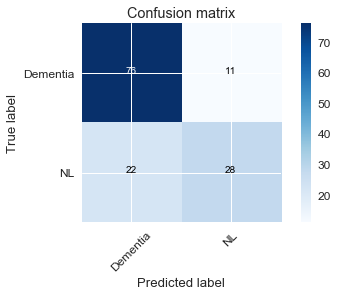